<a href="https://colab.research.google.com/github/kiruba-285/c/blob/main/Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer # Make sure the class name is correctly spelled as 'TfidfVectorizer'
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1' , engine = "python" , usecols=['v1','v2']) # Try reading the file with 'latin-1' encoding. If this doesn't work, try 'ISO-8859-1'

In [3]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
df.shape

(5572, 2)

In [6]:
df.size

11144

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.columns = ["label","message"]

In [11]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().values.any()

False

In [13]:
df.isnull().sum()

,0
label,0
message,0


In [14]:
df.duplicated().sum()

403

In [15]:
df.drop_duplicates(inplace=True)


In [16]:
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


Record Visualization

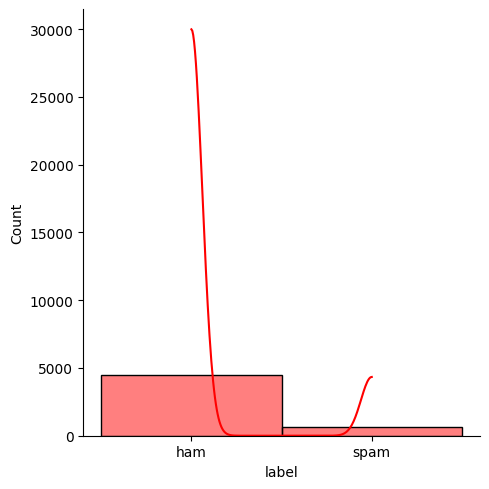

In [17]:
sns.displot(df.label, kde=True, color='red')

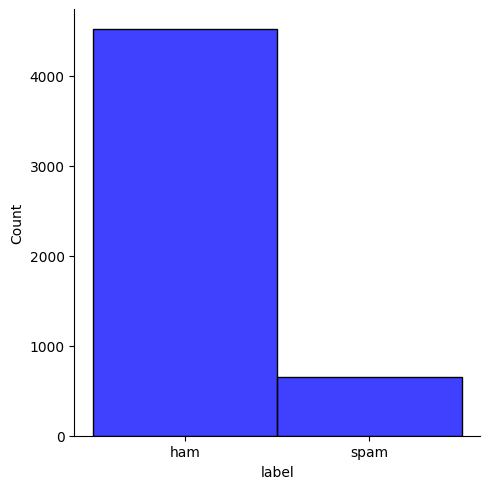

In [19]:
sns.displot(df.label, color="blue")

LabelEncoder to encode categorical variable(label) to numeric.

In [20]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


TF-IDF Vectorization

In [21]:
vectorizer = TfidfVectorizer()

In [22]:
x = vectorizer.fit_transform(df['message'])
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
y = df['label']

In [24]:
x.shape


(5169, 8672)

In [25]:
y.shape


(5169,)

In [26]:
df.count()

,0
label,5169
message,5169


Spam label Visualization on the basis of records in pie-chart

In [27]:
p, k = len(df[df["label"]==0]), len(df[df["label"]==1])

In [28]:
# Check if the dataset is loaded correctly
print(df.head())

# Check if there are any missing or empty values
print(df.isnull().sum())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label      0
message    0
dtype: int64


In [29]:
# Count the labels
label_counts = df['label'].value_counts()

# For visualization purposes, we can label the spam and ham messages
labels = ['Ham', 'Spam']
sizes = label_counts.values

print(label_counts)  # This will display the counts of spam and ham messages


label
ham     4516
spam     653
Name: count, dtype: int64


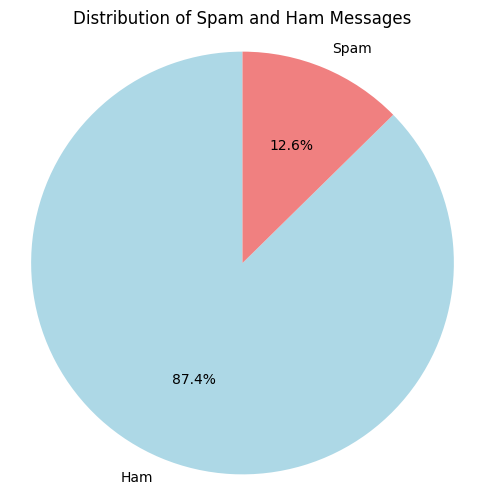

In [30]:
import matplotlib.pyplot as plt

# Plot a pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Spam and Ham Messages')
plt.show()


Preprocess the data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Train Naive Bayes Classifier

In [32]:
naive_bayes_model = MultinomialNB()

In [34]:
naive_bayes_model.fit(x_train, y_train)

MultinomialNB()

In [35]:
nb_predictions = naive_bayes_model.predict(x_test)

In [42]:
print("Naive Bayes Model:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("Precision_score: ", precision_score(y_test, nb_predictions, pos_label='spam')) # Set pos_label to 'spam'
print("Recall_score: ", recall_score(y_test, nb_predictions, pos_label='spam')) # Set pos_label to 'spam'
print("f1_score: ", f1_score(y_test, nb_predictions, pos_label='spam')) # Set pos_label to 'spam'



Naive Bayes Model:
[[889   0]
 [ 46  99]]
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       889
        spam       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy:  0.9555125725338491
Precision_score:  1.0
Recall_score:  0.6827586206896552
f1_score:  0.8114754098360656


Train Logistic Regression Model

In [44]:
logistic_regression_model = LogisticRegression()

In [46]:
logistic_regression_model.fit(x_train, y_train)

LogisticRegression()

In [48]:
lr_predictions = logistic_regression_model.predict(x_test)

In [52]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("Precision_score: ", precision_score(y_test, lr_predictions, pos_label='spam')) # Set pos_label to 'spam'
print("Recall_score: ", recall_score(y_test, lr_predictions, pos_label='spam')) # Set pos_label to 'spam'
print("f1_score: ", f1_score(y_test, lr_predictions, pos_label='spam')) # Set pos_label to 'spam'



Logistic Regression Model:
[[886   3]
 [ 43 102]]
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       889
        spam       0.97      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy:  0.9555125725338491
Precision_score:  0.9714285714285714
Recall_score:  0.7034482758620689
f1_score:  0.8160000000000001


Train Support Vector Machine Model (SVM)

In [53]:
svm_model = SVC(kernel='linear')

In [56]:
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [58]:
svm_predictions = svm_model.predict(x_test)

In [60]:
print("Support Vector Machine (SVM) Model:")
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))
print("Accuracy: ", accuracy_score(y_test, svm_predictions))
print("Precision_score: ", precision_score(y_test, svm_predictions, pos_label='spam')) # Set pos_label to 'spam'
print("Recall_score: ", recall_score(y_test, svm_predictions, pos_label='spam')) # Set pos_label to 'spam'
print("f1_score: ", f1_score(y_test, svm_predictions, pos_label='spam')) # Set pos_label to 'spam'


Support Vector Machine (SVM) Model:
[[886   3]
 [ 14 131]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       889
        spam       0.98      0.90      0.94       145

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy:  0.9835589941972921
Precision_score:  0.9776119402985075
Recall_score:  0.903448275862069
f1_score:  0.939068100358423
